<a href="https://colab.research.google.com/github/LongS1eeper/ML-DL_Prac/blob/%ED%98%BC%EA%B3%B5/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_08_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

## 가중치 시각화

In [2]:
from tensorflow import keras

In [3]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2025-04-27 11:53:47--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2025-04-27 11:53:48--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.05s   

2025-04-27 11:53:49 (78.5 MB/s) - ‘best-cnn-model.keras’ saved [4038273/4038273]



In [4]:
# 이전 가장 효과적이었던 모델 불러오기
model = keras.models.load_model('best-cnn-model.keras')

In [5]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [29]:
# 합성곱 층의 가중치 조사
# 층의 가중치와 절편은 층의 weights 속성에 저장
# 모델의 첫 번째 층을 가져온다 (여기서는 Conv2D 층)
conv = model.layers[0]

# weights의 첫번째 원소(가중치), 두번쨰 원소(절편) 크기 출력
print(conv.weights[0].shape, conv.weights[1].shape)

# "각 3×3 필터의 (0,0) 위치 값 32개 → (0,1) 위치 값 32개 → ... (2,2) 위치 값 32개 순서대로 쭉 나열한 것."
print(conv.weights[0])
print(conv.weights[1])

(3, 3, 1, 32) (32,)
<Variable path=conv2d/kernel, shape=(3, 3, 1, 32), dtype=float32, value=[[[[ 2.74282396e-01  7.97015354e-02 -1.15523733e-01  2.31172547e-01
    -2.29703560e-01  1.09120652e-01  1.30144432e-01 -2.15354219e-01
     3.86733599e-02  1.30838141e-01 -1.53798938e-01  5.52063575e-03
     1.45318776e-01  2.19199881e-01  2.21167803e-01  5.84863946e-02
    -2.91527897e-01 -1.19415790e-01  7.10553601e-02 -9.31582451e-02
    -8.85529965e-02  6.93083853e-02  2.08662912e-01 -1.87353194e-01
     2.79599726e-01 -1.12577009e+00  9.22416672e-02  1.53366789e-01
     3.42050418e-02 -9.06434730e-02 -1.15491457e-01  2.07771003e-01]]

  [[-2.38588437e-01 -2.08250470e-02 -3.73427197e-02 -2.68663615e-01
     5.57515621e-02 -1.27273083e-01  9.38645899e-02  1.03232980e-01
    -2.07055315e-01  1.69468999e-01  4.11303900e-02 -3.33466500e-01
     2.87439704e-01  5.10699302e-02  2.32114762e-01 -1.42155901e-01
    -2.21298635e-01  6.44937111e-03  1.11203469e-01  1.57017082e-01
    -4.99646306e-01 -

In [7]:
conv_weights = conv.weights[0].numpy()

# 가중치의 평균과 표준편차 확인
print(conv_weights.mean(), conv_weights.std())

-0.014383553 0.23351653


In [8]:
import matplotlib.pyplot as plt

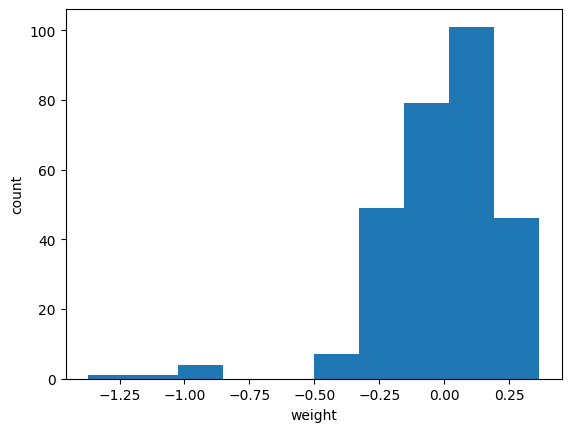

In [9]:
plt.hist(conv_weights.reshape(-1, 1))  # 1차원 배열로 전달
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

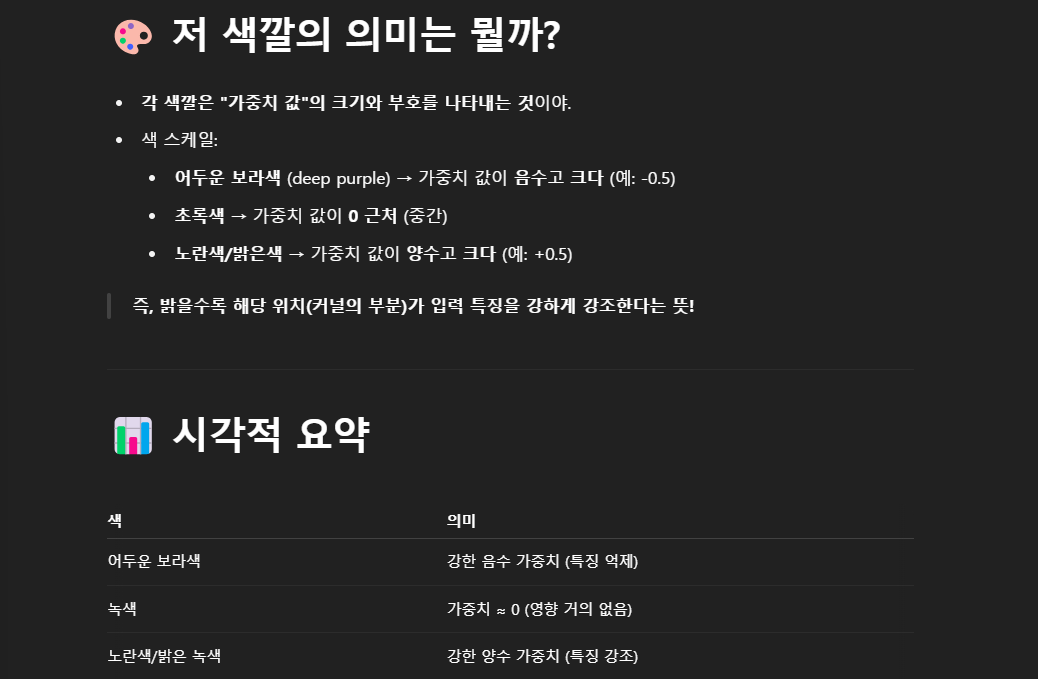

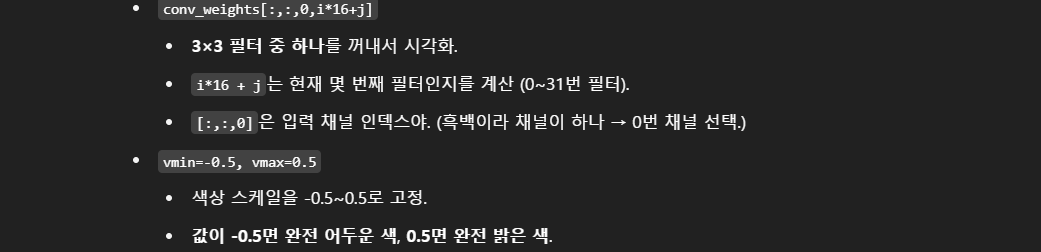

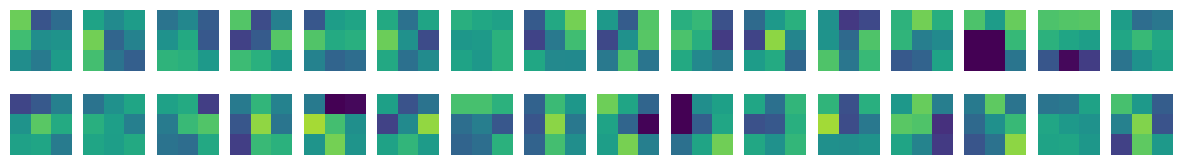

In [10]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))  # 32개 템플릿 형성

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

# 색이
plt.show()

In [11]:
# 위에 훈련된 모델과 비교하기 위해 새 모델 간단하게 구성
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.0053191613 0.08463709


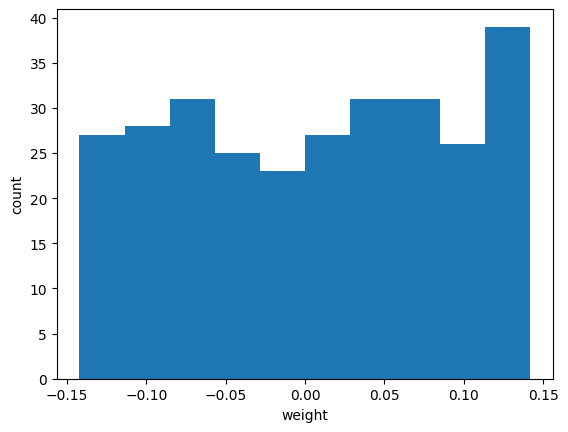

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

# 비교적 균등하게 배분
plt.show()

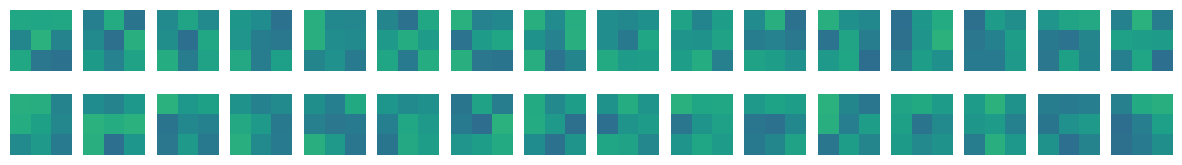

In [15]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

# 이전 모델에 비해 밋밋한 것을 볼 수 있음
plt.show()

## 함수형 API

conv_acti는 원래 모델에서 입력 → 첫 합성곱 층 출력까지만 사용하는 "부분 모델"이고, <br>합성곱 층이 어떤 특징을 잡아냈는지 중간 과정을 시각화하기 위해 만듦

In [16]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [17]:
# 첫번째 요소는 입구, 두번째 요소는 마지막 출력 위치
conv_acti = keras.Model(model.inputs, model.layers[0].output)

## 특성 맵 시각화

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


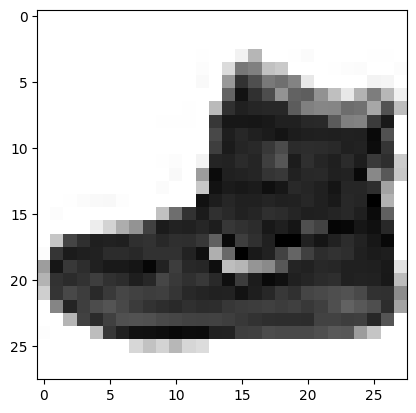

In [19]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [20]:
# predict() 메서드는 항상 입력의 첫 번쨰 차원이 배치 차원일 것으로 기대하므로 슬라이싱 전달
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step


In [21]:
# 32개의 필터 인해 이미지에서 강하게 활성화된 부분 보여줌
print(feature_maps.shape)

(1, 28, 28, 32)


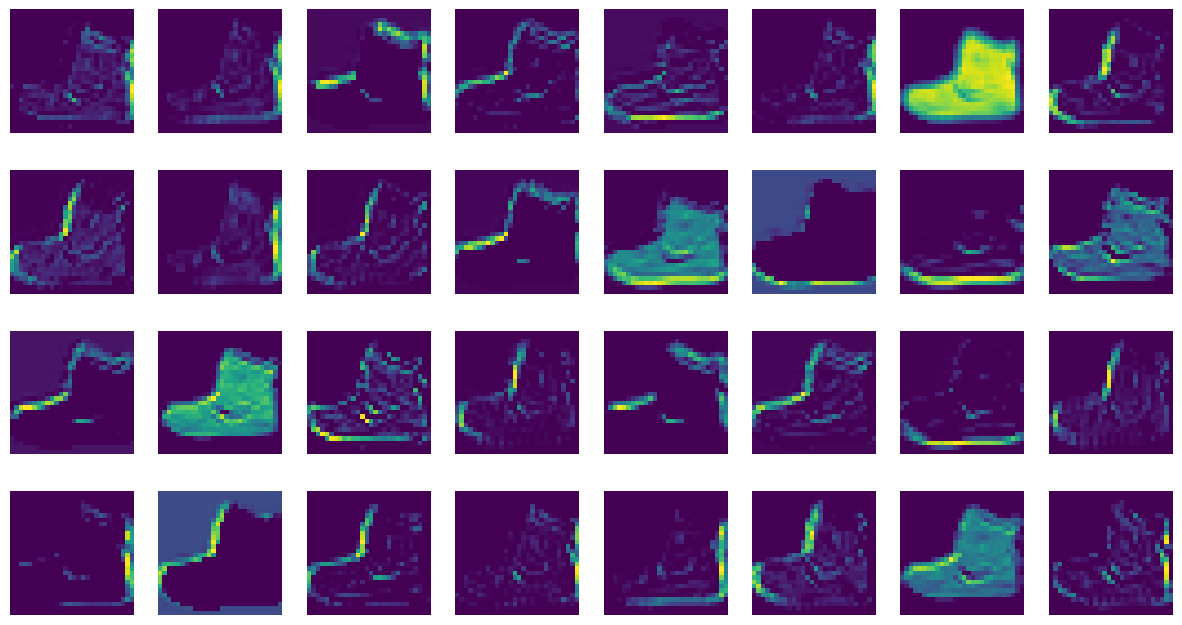

In [22]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [23]:
# 두번쨰 합성곱 층
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [24]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


In [25]:
# 풀링 이후이므로 14,14
print(feature_maps.shape)

(1, 14, 14, 64)


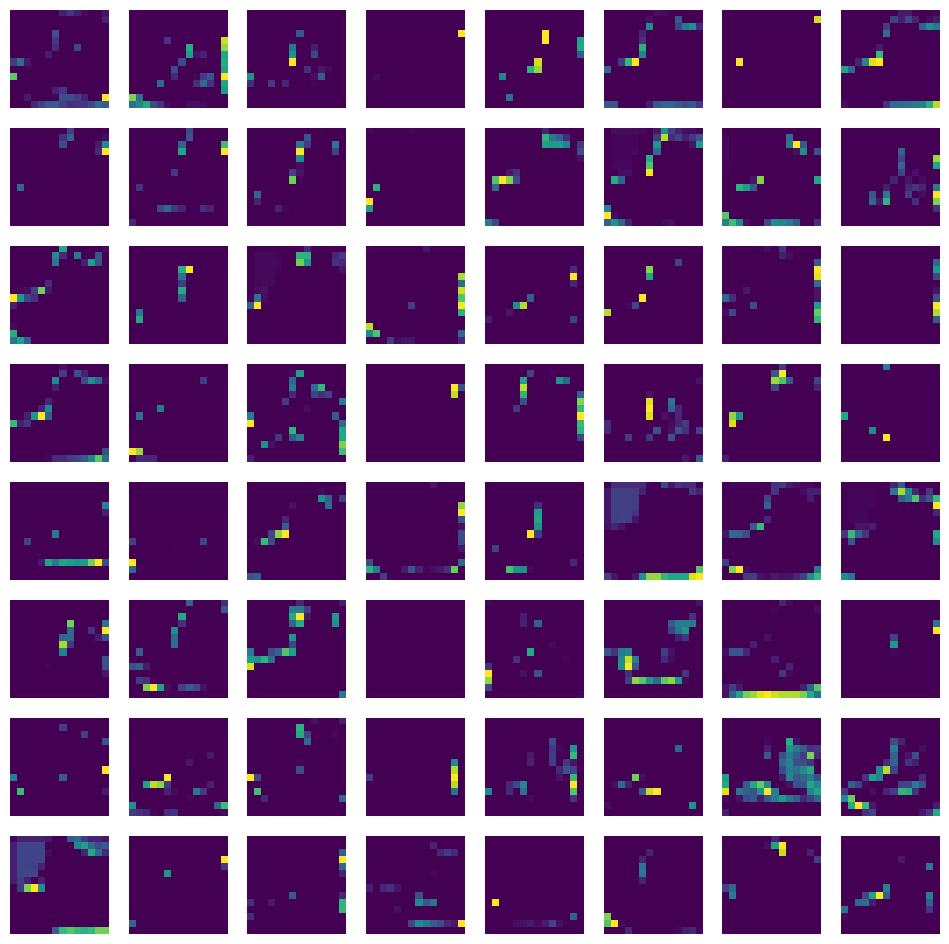

In [26]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')


# 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고
# 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있음
plt.show()